In [263]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [264]:
data = pd.read_csv('./LSTM_train_week4.csv', index_col='Date')
data.head()

,Price,Open,High,Low,Volume,Chg%,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
Date,,,,,,,,,,,,,,
4-Jan-21,47.62,48.40,49.83,47.18,528.53K,-1.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-Jan-21,49.93,47.38,50.20,47.24,643.19K,4.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6-Jan-21,50.63,49.82,50.94,49.48,509.37K,1.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7-Jan-21,50.83,50.53,51.28,50.39,369.29K,0.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8-Jan-21,52.24,50.93,52.75,50.81,499.42K,2.77%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
len(data)

505

In [266]:
data.tail()

,Price,Open,High,Low,Volume,Chg%,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
Date,,,,,,,,,,,,,,
23-Nov-22,77.94,81.08,81.95,76.83,379.15K,-3.72%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24-Nov-22,77.95,77.53,78.19,76.92,0,0.01%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25-Nov-22,76.28,77.51,79.90,76.22,266.45K,-2.14%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28-Nov-22,77.24,75.93,77.84,73.60,405.03K,1.26%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29-Nov-22,78.20,76.54,79.65,76.29,381.87K,1.24%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


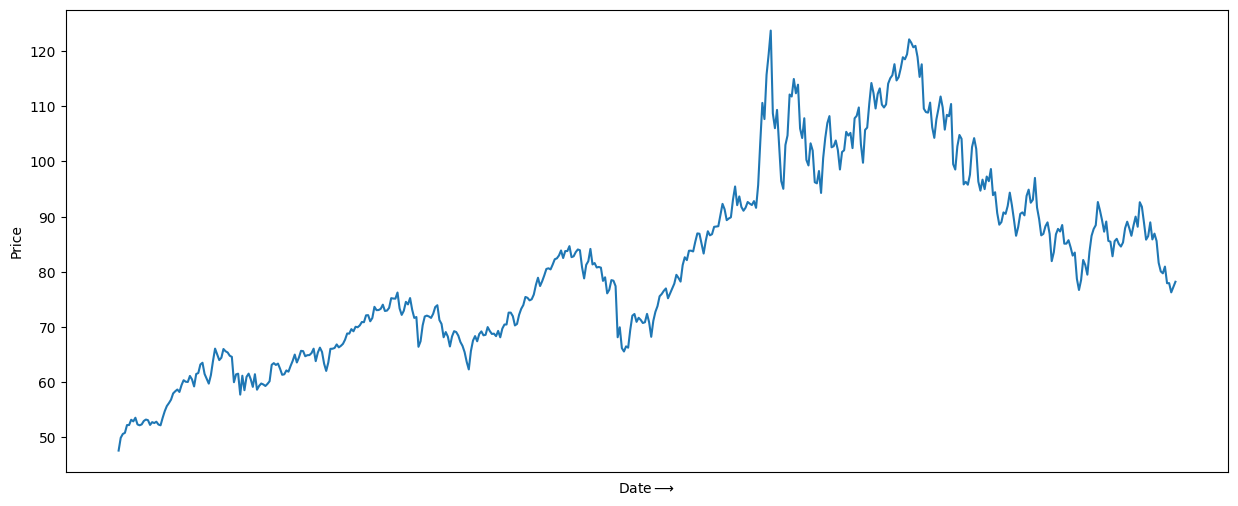

In [267]:
price_data = data['Price']
plt.figure(figsize=(15,6))
plt.xticks([])
plt.xlabel("Date$\longrightarrow$")
plt.ylabel("Price")
plt.plot(data.index,price_data)

In [268]:
from sklearn.preprocessing import MinMaxScaler

price_data.head()

Date
4-Jan-21    47.62
5-Jan-21    49.93
6-Jan-21    50.63
7-Jan-21    50.83
8-Jan-21    52.24
Name: Price, dtype: float64

In [269]:
len(price_data)

505

In [270]:
# Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
#from sklearn.preprocessing import StandardScaler

#normalizer = StandardScaler()
price_data = normalizer.fit_transform(np.array(price_data).reshape(-1,1))
price_data[:10]

array([[0.        ],
       [0.03036278],
       [0.03956362],
       [0.04219243],
       [0.06072555],
       [0.06085699],
       [0.07347529],
       [0.06953207],
       [0.07820715],
       [0.06230284]])

In [271]:
#Defining test and train data sizes
train_size = int(len(price_data)*0.7)
test_size = len(price_data) - train_size
train_size,test_size

(353, 152)

In [272]:
#Splitting data between train and test
pd_train, pd_test = price_data[0:train_size], price_data[train_size:len(price_data)]
len(pd_train),len(pd_test)

(353, 152)

In [273]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [274]:
#Taking 100 days price as one record for training
time_stamp = 50
X_train, y_train = create_ds(pd_train,time_stamp)
X_test, y_test = create_ds(pd_test,time_stamp)

In [275]:
X_train.shape,y_train.shape

((302, 50), (302,))

In [276]:
X_test.shape, y_test.shape

((101, 50), (101,))

In [277]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
y_train= y_train.reshape(y_train.shape[0], 1)
y_test= y_test.reshape(y_test.shape[0], 1)
X_train.shape,y_train.shape

((302, 50, 1), (302, 1))

In [278]:
X_test.shape, y_test.shape

((101, 50, 1), (101, 1))

In [279]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [280]:
# LSTM model using keras

model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape =(X_train.shape[1],1)))
model.add(LSTM(units = 50, return_sequences=True))
model.add(LSTM(units =50))
model.add(Dense(units = 1, activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_23 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_24 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [281]:
from tensorflow import keras

early_stopping = keras.callbacks.EarlyStopping(
    patience=70,
    restore_best_weights=True,
)

In [282]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=[early_stopping],batch_size=32)

Epoch 1/50
10/10 [==============================] - 11s 277ms/step - loss: 0.0713 - val_loss: 0.0072
Epoch 2/50
10/10 [==============================] - 1s 106ms/step - loss: 0.0137 - val_loss: 0.0028
Epoch 3/50
10/10 [==============================] - 1s 103ms/step - loss: 0.0077 - val_loss: 0.0041
Epoch 4/50
10/10 [==============================] - 1s 100ms/step - loss: 0.0066 - val_loss: 0.0075
Epoch 5/50
10/10 [==============================] - 1s 120ms/step - loss: 0.0052 - val_loss: 0.0071
Epoch 6/50
10/10 [==============================] - 1s 127ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 7/50
10/10 [==============================] - 1s 119ms/step - loss: 0.0053 - val_loss: 0.0122
Epoch 8/50
10/10 [==============================] - 1s 121ms/step - loss: 0.0049 - val_loss: 0.0084
Epoch 9/50
10/10 [==============================] - 1s 108ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 10/50
10/10 [==============================] - 1s 110ms/step - loss: 0.0045 - val_loss: 0.007

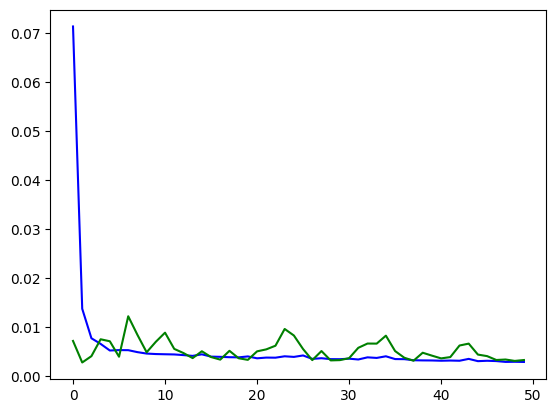

In [283]:
#PLotting loss, it shows that loss has decreased significantly and model trained well

loss = model.history.history['loss']
plt.plot(loss,color="blue")

val_loss = model.history.history['val_loss']
plt.plot(val_loss,color="green")

In [284]:
from sklearn.metrics import mean_squared_error

mean_squared_error(loss,val_loss)

8.95970010553544e-05

In [285]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 19ms/step


In [286]:
print('Mean Squared Error = ',mean_squared_error(test_predict,y_test))

Mean Squared Error =  0.0032797260916556923


In [287]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

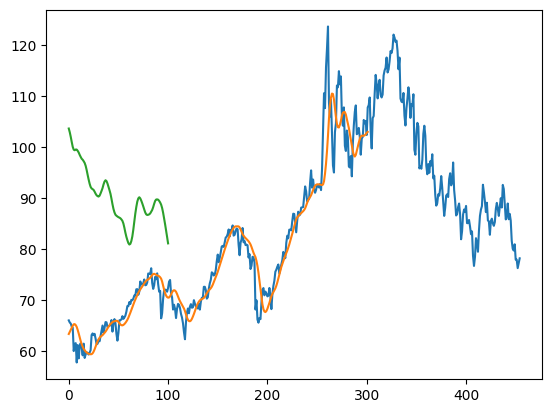

In [288]:
#Comparing using visuals
#plt.plot(normalizer.inverse_transform(price_data_scaled))
#plt.plot(train_predict)
#plt.plot(test_predict,color='red')
#plt.plot(normalizer.inverse_transform(y_train.reshape(-1,1)))
#plt.plot(normalizer.inverse_transform(y_test.reshape(-1,1)))
plt.plot(normalizer.inverse_transform(price_data)[50:])
plt.plot(train_predict)
plt.plot(test_predict)

In [289]:
test = np.vstack((train_predict,test_predict))

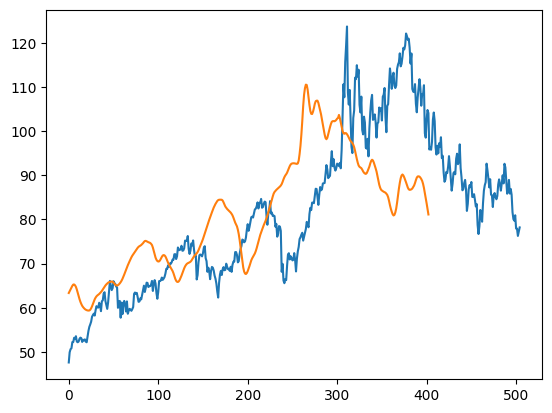

In [290]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(price_data))
plt.plot(test)

In [291]:
len(pd_test)

152

In [292]:
fut_inp = pd_test[25:]

In [293]:
fut_inp = fut_inp.reshape(1,-1)
fut_inp.shape

(1, 127)

In [294]:
#Creating list of the last 100 data
tmp_inp = fut_inp[0].tolist()
type(tmp_inp)

list

In [295]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=126
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[[0.41202330589294434], [0.40198421478271484], [0.3947829604148865], [0.3898791968822479], [0.3867487907409668], [0.3849552571773529], [0.38416460156440735], [0.3841349184513092], [0.38469669222831726], [0.3857325613498688], [0.38716113567352295], [0.3889237940311432], [0.3909757435321808], [0.3932802677154541], [0.3958051800727844], [0.3985208570957184], [0.4013991057872772], [0.40441325306892395], [0.4075376093387604], [0.4107476770877838], [0.41402047872543335], [0.41733473539352417], [0.42067083716392517], [0.42401084303855896], [0.4273383915424347], [0.4306395649909973], [0.43390169739723206], [0.43711432814598083], [0.4402681291103363], [0.4433556795120239]]


In [296]:
len(price_data)

505

In [297]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

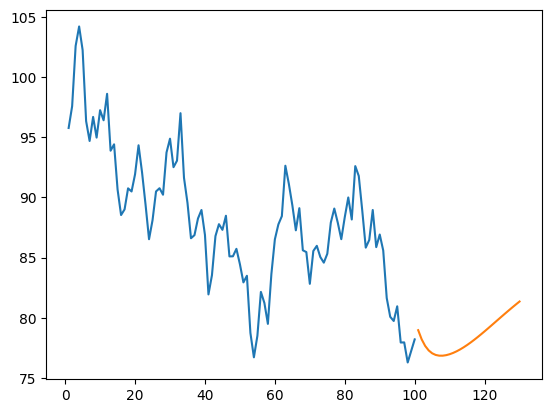

In [298]:
plt.plot(plot_new, normalizer.inverse_transform(price_data[405:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [299]:
pd_new = price_data.tolist()
len(pd_new)

505

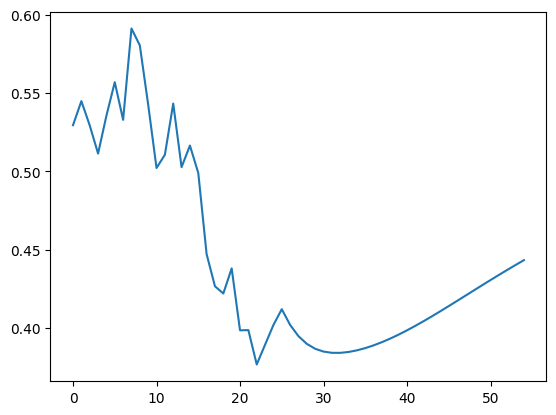

In [300]:
#Entends helps us to fill the missing value with approx value
pd_new.extend(lst_output)
plt.plot(pd_new[480:])

In [301]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(pd_new).tolist()
print(len(final_graph))
print(final_graph[505:])

535
[[78.9667331123352], [78.20295906066895], [77.65508762836457], [77.28200929880143], [77.04384799957276], [76.90739596605302], [76.84724288702012], [76.8449845957756], [76.88772434473037], [76.96653326749802], [77.07521920204162], [77.20932224988938], [77.36543456792832], [77.54076276779175], [77.73285809993745], [77.93946680784225], [78.15844396829606], [78.38776029348374], [78.6254613184929], [78.8696832728386], [79.11867802143097], [79.37082666873933], [79.62463729143143], [79.87874493837357], [80.13190482854843], [80.38305810451507], [80.63124113798142], [80.87565808534623], [81.11559926271438], [81.35050009727479]]


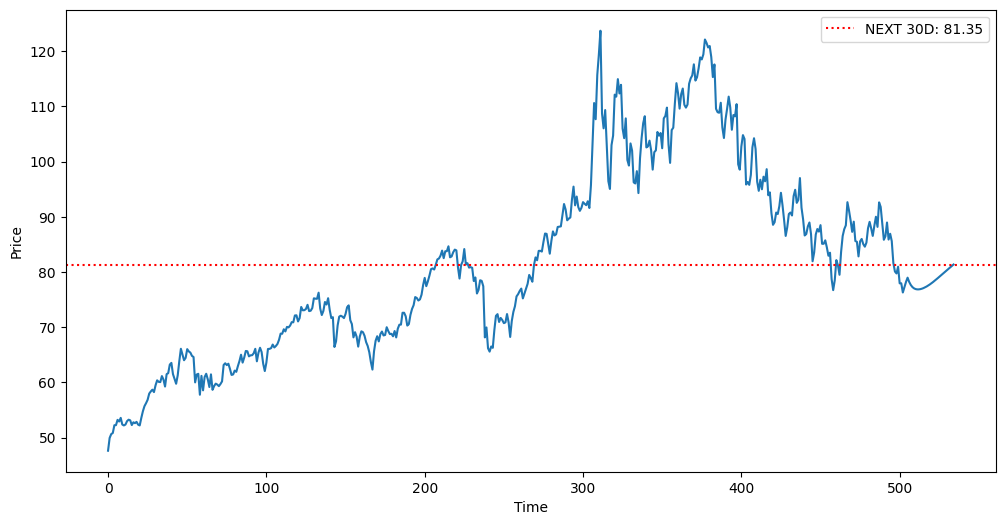

In [302]:
#Plotting final results with predicted value after 30 Days
plt.figure(figsize=(12,6))
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()